In [2]:
# Step 1: Import Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, precision_score, recall_score
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import random

In [1]:
image_dir = r"D:\UTKFace_Data\archive (4)\crop_part1"

In [3]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    labels = []
    total_files = os.listdir(folder)
    print(f"✅ Total files found: {len(total_files)}")
    for filename in total_files:
        if filename.endswith('.jpg'):
            age = int(filename.split('_')[0])
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(age)
    return np.array(images), np.array(labels)

# ✅ USE YOUR CORRECT PATH HERE
image_dir = r"D:\UTKFace_Data\archive (4)\crop_part1"
X, y = load_images_from_folder(image_dir)

print("✅ Loaded images:", X.shape)
print("✅ Sample ages:", y[:5])


✅ Total files found: 9781
✅ Loaded images: (9780, 224, 224, 3)
✅ Sample ages: [100 100 101  10  10]


In [4]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
base_model = MobileNetV2(include_top=False, input_shape=(224,224,3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1)(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [6]:
# Step 5: Train
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)

Epoch 1/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 71s 278ms/step - loss: 1022.4056 - mae: 24.2652 - val_loss: 612.5087 - val_mae: 20.5752
Epoch 2/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 261ms/step - loss: 610.2094 - mae: 20.5426 - val_loss: 528.5697 - val_mae: 19.1157
Epoch 3/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 56s 255ms/step - loss: 533.2352 - mae: 19.1012 - val_loss: 458.0587 - val_mae: 17.3767
Epoch 4/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 57s 256ms/step - loss: 467.5024 - mae: 17.7242 - val_loss: 405.6593 - val_mae: 16.3141
Epoch 5/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 57s 258ms/step - loss: 427.0537 - mae: 16.7865 - val_loss: 377.7267 - val_mae: 15.6130
Epoch 6/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 57s 259ms/step - loss: 409.3799 - mae: 16.2644 - val_loss: 368.2386 - val_mae: 15.1618
Epoch 7/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 58s 262ms/step - loss: 390.6697 - mae: 15.7133 - val_loss: 350.6827 - val_mae: 14.9210
Epoch 8/10
221/221 ━━━━━━━━━━━━━━━━━━━━ 57s 258ms/step - loss: 373.4180 - mae: 15.3059 - val_loss: 351.1140 - 

In [7]:
# Step 6: Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae} years")

62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - loss: 329.7144 - mae: 14.4814
Test Loss: 343.5532531738281
Test MAE: 14.745071411132812 years


In [8]:
# Step 7: Save model
model.save("age_detection_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


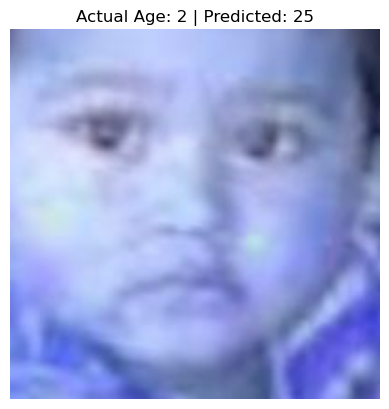

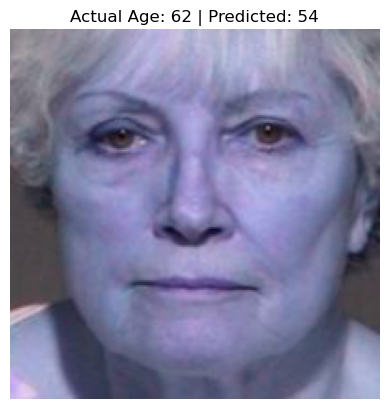

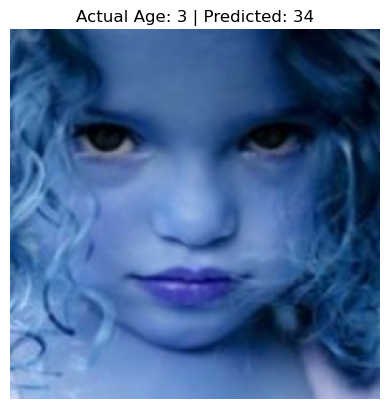

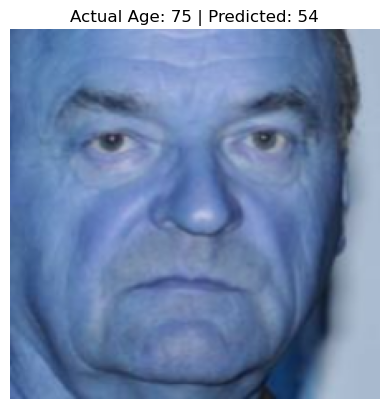

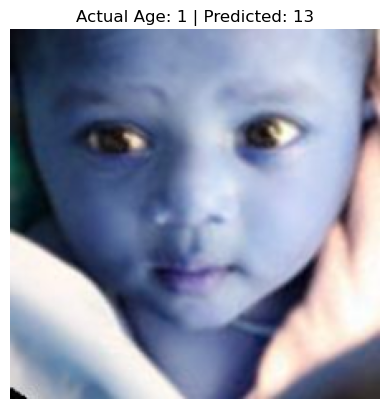

In [9]:
# Step 8: Sample predictions
indices = random.sample(range(len(X_test)), 5)
sample_images = X_test[indices]
sample_labels = y_test[indices]
predictions = model.predict(sample_images)

for i in range(5):
    plt.imshow(sample_images[i])
    plt.title(f"Actual Age: {sample_labels[i]} | Predicted: {int(predictions[i][0])}")
    plt.axis('off')
    plt.show()

In [10]:
# Step 9: Metrics
y_pred = model.predict(X_test).flatten().astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# These metrics may be approximated by converting regression to classification
# for a more advanced evaluation you can bin the ages
# Note: Precision and recall are not typically used in regression